In [1]:
#This module is meant to compare the effect of choosing initial conditions for phi, phi'.
#My prior is that as long as we are deep in radiation domination, the specific choice of ICs should not matter ---
#however there is some non-triviality with regards to the shooting parameter.... I'm thinking that if I start with the
#same a_initial but specify different ICs then the shooting parameter (V0 for now...) would eventually take on a 
#different value for these new ICs GIVEN a choice for H0... since it needs to fine-tune the rolling of the field such
#that the field reaches the minimum at the correct epoch to reproduce \Lambda

In [2]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
params={'T_cmb':2.7255, 'H0':68,
        'Omega_b':0.053,'Omega_cdm':0.296, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,33.9627,1.0,17.3,10**11' , 
        'scf_tuning_index':4, 'a_ini_over_a_today_default' : 10**-19,'output':'lCl, tCl','lensing':'yes'}
QCDM = Class()
QCDM.set(params)
QCDM.compute()
lensed_cl = QCDM.lensed_cl(2000)
bgQCDM = QCDM.get_background()
zlist = bgQCDM['z']
alist = 1/(zlist + 1)

Text(0, 0.5, '$w_\\phi$')

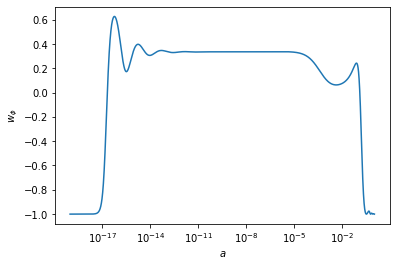

In [4]:
plt.semilogx(alist, (bgQCDM['(.)p_scf']/bgQCDM['(.)rho_scf']))
plt.xlabel(r"$a$")
plt.ylabel(r"$w_\phi$")

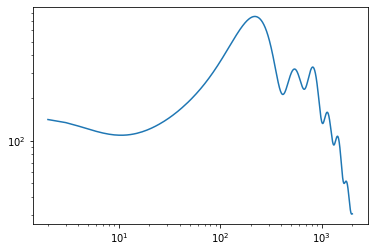

In [5]:
l = np.array(range(2,2000 + 1))
factor = l*(l+1)/(2*np.pi)
p1 = plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:])

In [74]:
QCDM.struct_cleanup()
QCDM.empty()

qcdm2.struct_cleanup()
qcdm2.empty()

In [81]:
params2={'T_cmb':2.7255, 'H0':68,
        'Omega_b':0.053,'Omega_cdm':0.296, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
      'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,33.9627,1.0,15,7*10**13' , 
       'scf_tuning_index':4, 'a_ini_over_a_today_default' : 10**-19,'output':'lCl, tCl','lensing':'yes'}

qcdm2 = Class()
qcdm2.set(params2)
qcdm2.compute()
lensed_cl2 = qcdm2.lensed_cl(2000)
bgqcdm2 = qcdm2.get_background()
zlist2 = bgqcdm2['z']
alist2 = 1/(zlist2 + 1)

In [82]:
#p2 = plt.semilogx(alist2, (bgqcdm2['(.)p_scf']/bgqcdm2['(.)rho_scf']))
#plt.xlabel(r"$a$")
#plt.ylabel(r"$w_\phi$")

In [83]:
#l = np.array(range(2,2000 + 1))
#factor = l*(l+1)/(2*np.pi)
#plt.loglog(l,factor*10**(12)*lensed_cl2['tt'][2:])

Text(0, 0.5, '$w_\\phi$')

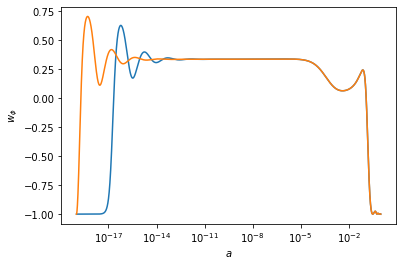

In [84]:
plt.semilogx(alist, (bgQCDM['(.)p_scf']/bgQCDM['(.)rho_scf']),alist2, (bgqcdm2['(.)p_scf']/bgqcdm2['(.)rho_scf'])   )
plt.xlabel(r"$a$")
plt.ylabel(r"$w_\phi$")

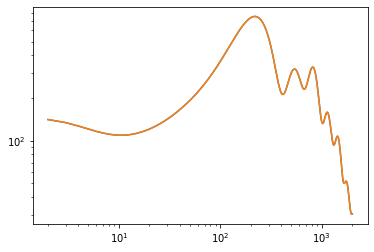

In [85]:
plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:],l,factor*10**(12)*lensed_cl2['tt'][2:])